# Análisis exploratorio (EDA)

Este Notebook se encarga del análisis, la exploración y la limpieza de los datos, y las posteriores visualizaciones que he considerado óptimas para el estudio del Dataset 'Automobile' con el fin de intentar determinar relaciones entre las características de los coches.

El fichero 'imports-85.data' dentro de la carpeta 'automobile' contiene los datos sobre los que trabajaremos.

### Importación de bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga adecuada del Dataset

In [37]:
# Creamos una lista para poner nombre a los atributos (columnas) tal y como vienen en el fichero 'imports-85.names'
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
    "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]

# Cargamos el Dataset desde el archivo local
df = pd.read_csv("automobile/imports-85.data", names=column_names, decimal='.')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Análisis exploratorio y limpieza de datos

Vamos a explorar cada atributo de forma individualizada para asegurar la calidad de los datos, incluyendo:
    
· Verificación de valores únicos
    
· Conteo de valores
    
· Verificación de valores nulos
    
· Verificación de valores anómalos
    
· Tratamiento de datos

· Visualización

Análisis preliminar de la columna 'symboling'

Valores únicos en symboling: [ 3  1  2  0 -1 -2]

Conteo de valores en symboling:
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Valores nulos en symboling: 0

Visualización:


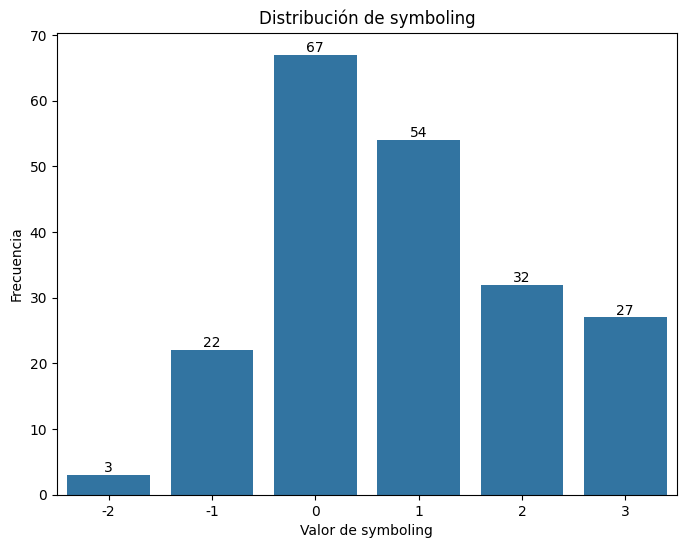

In [38]:
print("Análisis preliminar de la columna 'symboling'\n")

# Verificamos valores únicos
unique_values_symboling = df['symboling'].unique()
print(f"Valores únicos en symboling: {unique_values_symboling}\n")

# Contamos valores
value_counts_symboling = df['symboling'].value_counts()
print(f"Conteo de valores en symboling:")
print(value_counts_symboling)

# Verificamos valores nulos
null_values_symboling = df['symboling'].isnull().sum()
print(f"\nValores nulos en symboling: {null_values_symboling}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='symboling', data=df)
plt.title('Distribución de los valores de la columna symboling')
plt.title('Distribución de symboling')
plt.xlabel('Valor de symboling')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'normalized-losses'

Valores únicos en normalized-losses: [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]

Valores nulos en normalized-losses: 41

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

Valores nulos después de la imputación: 0

Visualización:


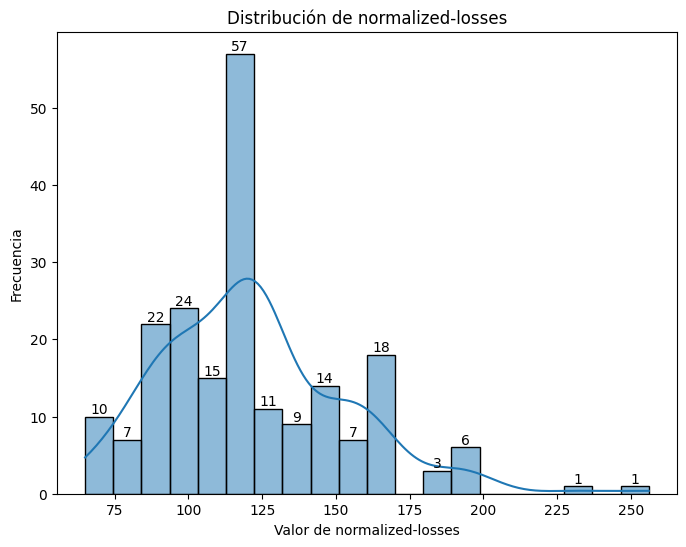

In [39]:
print("Análisis preliminar de la columna 'normalized-losses'\n")

# Reemplazamos valores '?' por NaN y convertimos a tipo numérico
df['normalized-losses'] = df['normalized-losses'].replace('?', pd.NA)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])

# Verificamos valores únicos
unique_values_normalized_losses = df['normalized-losses'].unique()
print(f"Valores únicos en normalized-losses: {unique_values_normalized_losses}\n")

# Verificamos valores nulos
null_values_normalized_losses = df['normalized-losses'].isnull().sum()
print(f"Valores nulos en normalized-losses: {null_values_normalized_losses}\n")

# Realizamos un análisis estadístico preliminar para verificar la coherencia de los datos
print(df['normalized-losses'].describe())

# Rellenamos valores NaN con la media de la distribución
mean_value = df['normalized-losses'].mean()
df['normalized-losses'] = df['normalized-losses'].fillna(mean_value)
print(f"\nValores nulos después de la imputación: {df['normalized-losses'].isnull().sum()}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['normalized-losses'], bins=20, kde=True)
plt.title('Distribución de normalized-losses')
plt.xlabel('Valor de normalized-losses')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:  # Solo etiquetamos las barras con altura positiva
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')
    
print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'make'

Valores únicos en 'make': ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Conteo de valores en 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugeot          11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

Valores nulos en 'make': 0

Visualización:


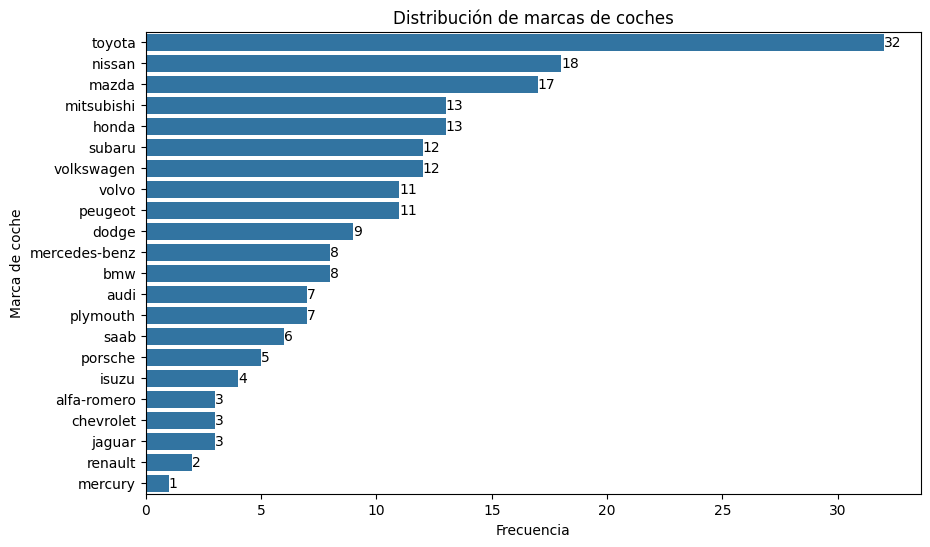

In [40]:
print("Análisis preliminar de la columna 'make'\n")

# Verificamos valores únicos
unique_values_make = df['make'].unique()
print(f"Valores únicos en 'make': {unique_values_make}\n")

# Corregimos la marca 'peugot' (mal escrita) por 'peugeot'
df['make'] = df['make'].replace('peugot', 'peugeot')

# Conteo de valores
value_counts_make = df['make'].value_counts()
print(f"Conteo de valores en 'make':")
print(value_counts_make)

# Verificamos valores nulos
null_values_make = df['make'].isnull().sum()
print(f"\nValores nulos en 'make': {null_values_make}\n")

# Visualizamos la distribución
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Distribución de marcas de coches')
plt.xlabel('Frecuencia')
plt.ylabel('Marca de coche')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')
    
print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'fuel-type'

Valores únicos en 'fuel-type': ['gas' 'diesel']

Conteo de valores en 'fuel-type':
fuel-type
gas       185
diesel     20
Name: count, dtype: int64

Valores nulos en 'fuel-type': 0

Visualización:


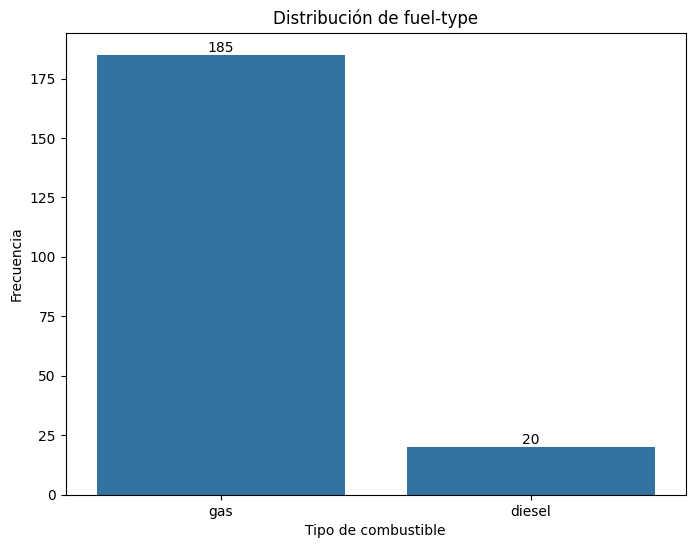

In [41]:
print("Análisis preliminar de la columna 'fuel-type'\n")

# Verificamos valores únicos
unique_values_fuel_type = df['fuel-type'].unique()
print(f"Valores únicos en 'fuel-type': {unique_values_fuel_type}\n")

# Conteo de valores
value_counts_fuel_type = df['fuel-type'].value_counts()
print(f"Conteo de valores en 'fuel-type':")
print(value_counts_fuel_type)

# Verificamos valores nulos
null_values_fuel_type = df['fuel-type'].isnull().sum()
print(f"\nValores nulos en 'fuel-type': {null_values_fuel_type}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fuel-type', data=df)
plt.title('Distribución de fuel-type')
plt.xlabel('Tipo de combustible')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'aspiration'

Valores únicos en 'aspiration': ['std' 'turbo']

Conteo de valores en 'aspiration':
aspiration
std      168
turbo     37
Name: count, dtype: int64

Valores nulos en 'aspiration': 0

Visualización:


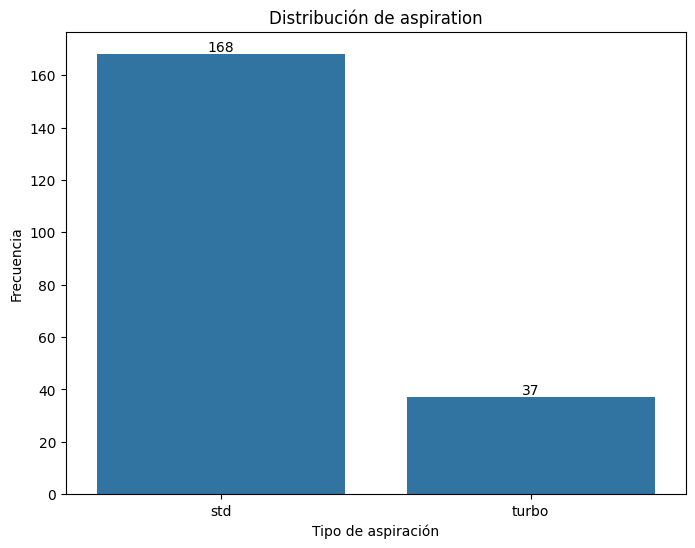

In [42]:
print("Análisis preliminar de la columna 'aspiration'\n")

# Verificamos valores únicos
unique_values_aspiration = df['aspiration'].unique()
print(f"Valores únicos en 'aspiration': {unique_values_aspiration}\n")

# Conteo de valores
value_counts_aspiration = df['aspiration'].value_counts()
print(f"Conteo de valores en 'aspiration':")
print(value_counts_aspiration)

# Verificamos valores nulos
null_values_aspiration = df['aspiration'].isnull().sum()
print(f"\nValores nulos en 'aspiration': {null_values_aspiration}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='aspiration', data=df)
plt.title('Distribución de aspiration')
plt.xlabel('Tipo de aspiración')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()


Análisis preliminar de la columna 'num-of-doors'

Valores únicos en 'num-of-doors': ['two' 'four' '?']

Conteo de valores en 'num-of-doors':
num-of-doors
four    114
two      89
?         2
Name: count, dtype: int64

Valores únicos en 'num-of-doors' después del reemplazo: ['two' 'four' <NA>]

Valores nulos en 'num-of-doors' después del reemplazo: 2

Valores nulos rellenados con la moda: four

Conteo de valores en 'num-of-doors' después de la imputación:
num-of-doors
four    116
two      89
Name: count, dtype: int64
Visualización:


C:\Users\rtx11679\AppData\Local\Temp\ipykernel_18584\1009340662.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(mode_value_num_doors, inplace=True)


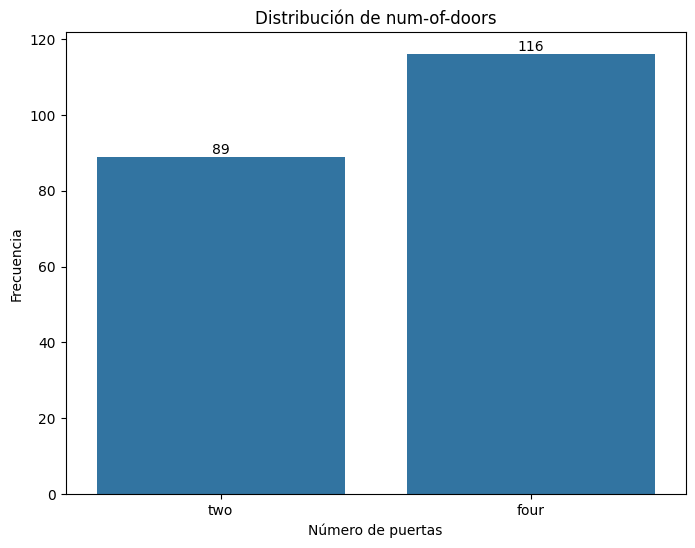

In [43]:
print("Análisis preliminar de la columna 'num-of-doors'\n")

# Verificamos valores únicos
unique_values_num_doors = df['num-of-doors'].unique()
print(f"Valores únicos en 'num-of-doors': {unique_values_num_doors}\n")

# Conteo de valores
value_counts_num_doors = df['num-of-doors'].value_counts()
print(f"Conteo de valores en 'num-of-doors':")
print(value_counts_num_doors)

# Reemplazamos valores '?' por NaN
df['num-of-doors'] = df['num-of-doors'].replace('?', pd.NA)

# Verificamos valores únicos después del reemplazo
unique_values_num_doors = df['num-of-doors'].unique()
print(f"\nValores únicos en 'num-of-doors' después del reemplazo: {unique_values_num_doors}\n")

# Verificamos valores nulos
null_values_num_doors = df['num-of-doors'].isnull().sum()
print(f"Valores nulos en 'num-of-doors' después del reemplazo: {null_values_num_doors}\n")

# Reemplazamos valores nulos con la moda
if null_values_num_doors > 0:
    mode_value_num_doors = df['num-of-doors'].mode()[0]
    df['num-of-doors'].fillna(mode_value_num_doors, inplace=True)
    print(f"Valores nulos rellenados con la moda: {mode_value_num_doors}\n")

# Conteo de valores después de la imputación
value_counts_num_doors = df['num-of-doors'].value_counts()
print(f"Conteo de valores en 'num-of-doors' después de la imputación:")
print(value_counts_num_doors)

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='num-of-doors', data=df)
plt.title('Distribución de num-of-doors')
plt.xlabel('Número de puertas')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'body-style'

Valores únicos en 'body-style': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Conteo de valores en 'body-style':
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
Valores nulos en 'body-style': 0

Visualización:


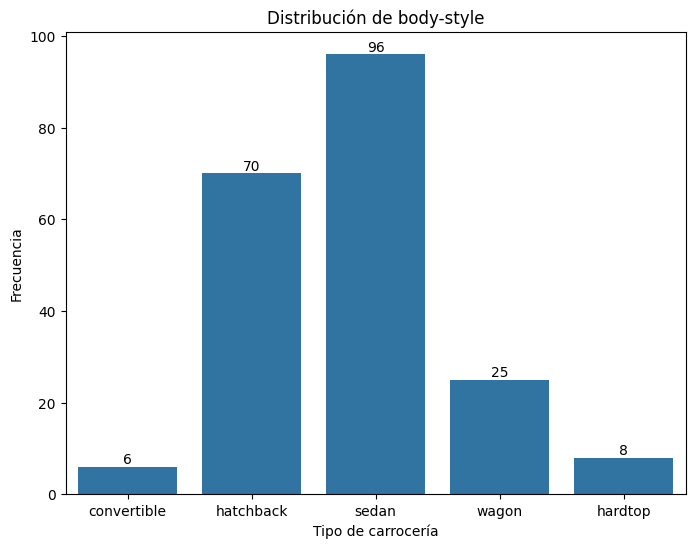

In [44]:
print("Análisis preliminar de la columna 'body-style'\n")

# Verificamos valores únicos
unique_values_body_style = df['body-style'].unique()
print(f"Valores únicos en 'body-style': {unique_values_body_style}\n")

# Conteo de valores
value_counts_body_style = df['body-style'].value_counts()
print(f"Conteo de valores en 'body-style':")
print(value_counts_body_style)

# Verificamos valores nulos
null_values_body_style = df['body-style'].isnull().sum()
print(f"Valores nulos en 'body-style': {null_values_body_style}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='body-style', data=df)
plt.title('Distribución de body-style')
plt.xlabel('Tipo de carrocería')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'drive-wheels'

Valores únicos en 'drive-wheels': ['rwd' 'fwd' '4wd']

Conteo de valores en 'drive-wheels':
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
Valores nulos en 'drive-wheels': 0

Visualización:


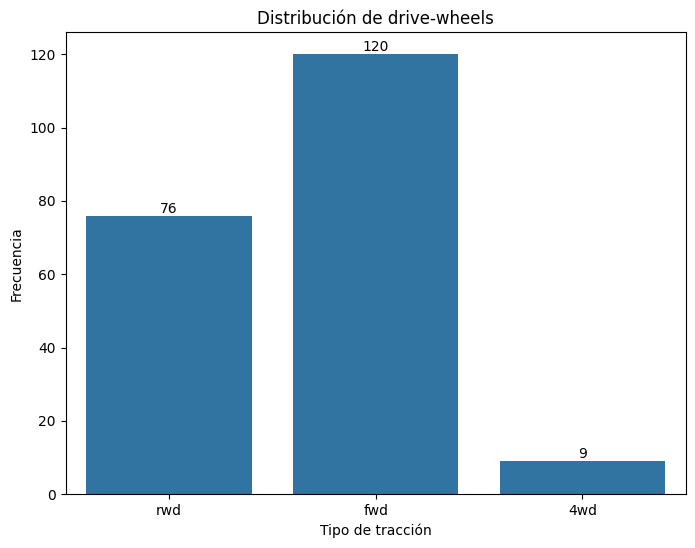

In [45]:
print("Análisis preliminar de la columna 'drive-wheels'\n")

# Verificamos valores únicos
unique_values_drive_wheels = df['drive-wheels'].unique()
print(f"Valores únicos en 'drive-wheels': {unique_values_drive_wheels}\n")

# Conteo de valores
value_counts_drive_wheels = df['drive-wheels'].value_counts()
print(f"Conteo de valores en 'drive-wheels':")
print(value_counts_drive_wheels)

# Verificamos valores nulos
null_values_drive_wheels = df['drive-wheels'].isnull().sum()
print(f"Valores nulos en 'drive-wheels': {null_values_drive_wheels}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='drive-wheels', data=df)
plt.title('Distribución de drive-wheels')
plt.xlabel('Tipo de tracción')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'engine-location'

Valores únicos en 'engine-location': ['front' 'rear']

Conteo de valores en 'engine-location':
engine-location
front    202
rear       3
Name: count, dtype: int64
Valores nulos en 'engine-location': 0

Visualización:


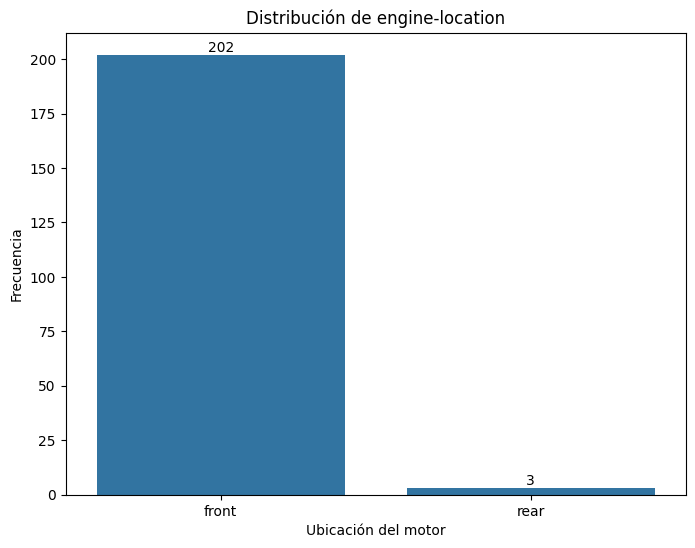

In [46]:
print("Análisis preliminar de la columna 'engine-location'\n")

# Verificamos valores únicos
unique_values_engine_location = df['engine-location'].unique()
print(f"Valores únicos en 'engine-location': {unique_values_engine_location}\n")

# Conteo de valores
value_counts_engine_location = df['engine-location'].value_counts()
print(f"Conteo de valores en 'engine-location':")
print(value_counts_engine_location)

# Verificamos valores nulos
null_values_engine_location = df['engine-location'].isnull().sum()
print(f"Valores nulos en 'engine-location': {null_values_engine_location}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='engine-location', data=df)
plt.title('Distribución de engine-location')
plt.xlabel('Ubicación del motor')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'wheel-base'

Valores únicos en 'wheel-base': [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]

Estadísticas descriptivas de la columna 'wheel-base':

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

Valores nulos en 'wheel-base': 0

Visualización:


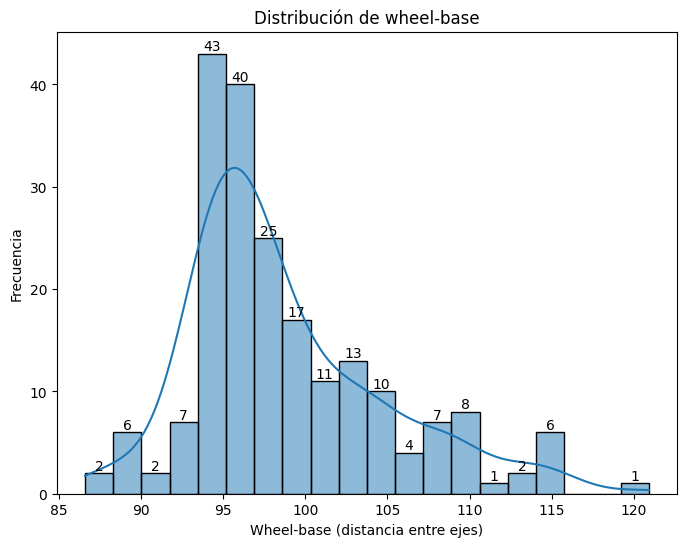

In [47]:
print("Análisis preliminar de la columna 'wheel-base'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'wheel-base': {df['wheel-base'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'wheel-base':\n")
print(df['wheel-base'].describe())

# Verificamos valores nulos
null_values_wheel_base = df['wheel-base'].isnull().sum()
print(f"\nValores nulos en 'wheel-base': {null_values_wheel_base}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['wheel-base'], bins=20, kde=True)
plt.title('Distribución de wheel-base')
plt.xlabel('Wheel-base (distancia entre ejes)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:  # Solo etiquetamos las barras con altura positiva
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'length'

Valores únicos en 'length': [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]

Estadísticas descriptivas de la columna 'length':

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

Valores nulos en 'length': 0

Visualización:


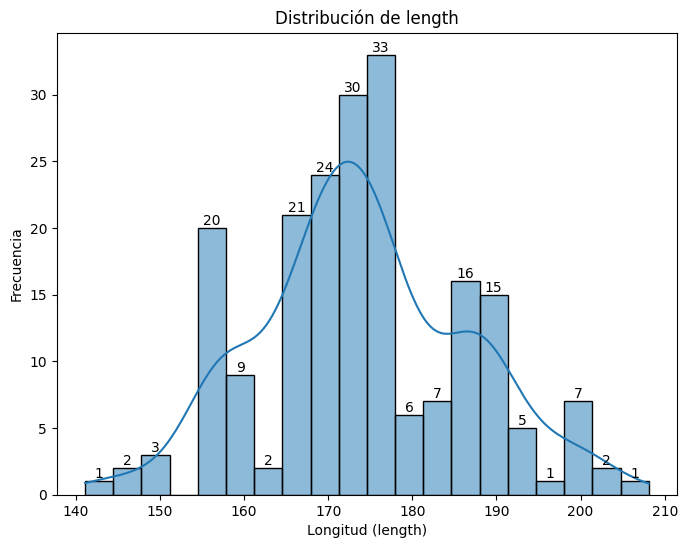

In [48]:
print("Análisis preliminar de la columna 'length'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'length': {df['length'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'length':\n")
print(df['length'].describe())

# Verificamos valores nulos
null_values_length = df['length'].isnull().sum()
print(f"\nValores nulos en 'length': {null_values_length}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['length'], bins=20, kde=True)
plt.title('Distribución de length')
plt.xlabel('Longitud (length)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:  # Solo etiquetamos las barras con altura positiva
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Como podemos observar, existen varias columnas con valores nulos. Vamos a tratarlos de manera adecuada, mediante imputación o eliminación, según la relevancia de la columna para el estudio.

In [7]:
# Rellenamos columnas numéricas con la media o mediana, según el contexto
df["normalized_losses"] = df["normalized_losses"].fillna(df["normalized_losses"].mean())
df["bore"] = df["bore"].fillna(df["bore"].mean())
df["stroke"] = df["stroke"].fillna(df["stroke"].mean())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
df["peak_rpm"] = df["peak_rpm"].fillna(df["peak_rpm"].median())
df["price"] = df["price"].fillna(df["price"].median())

# Rellenamos columnas categóricas usando la moda
df["num_doors"] = df["num_doors"].fillna(df["num_doors"].mode()[0])

df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

##### Conversión de tipos de datos incorrectamente asignados

Convertimos algunas columnas relevantes para el estudio a numéricas

In [8]:
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["bore"] = pd.to_numeric(df["bore"], errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"], errors='coerce')
df["peak_rpm"] = pd.to_numeric(df["peak_rpm"], errors='coerce')

df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

##### Detectamos posibles duplicados y los eliminamos

In [9]:
print(f"Duplicados encontrados: {df.duplicated().sum()}")

Duplicados encontrados: 0


En este caso, no tenemos duplicados, sino los eliminaríamos con la función drop_duplicates()

##### Tratamos los espaciados innecesarios en variables categóricas

In [10]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

##### Detectamos posibles outliers y los tratamos mediante el método IQR

Dado que el rango de los atributos continuos está definido, utilizamos esta información para detectar outliers.
El método del rango intercuartílico (IQR) indica que un dato es considerado un outlier si se encuentra a más de 1.5 veces el rango intercuartílico por encima del tercer cuartil o por debajo del primer cuartil.

In [11]:
# Filtramos las columnas numéricas para aplicar el método IQR, ya que sino obtendríamos un error de tipos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Detectamos valores atípicos con el método IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtramos los outliers
outliers = df[((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Número de outliers encontrados: \n{outliers.count()}")

Número de outliers encontrados: 
symboling            73
normalized_losses    73
make                 73
fuel_type            73
aspiration           73
num_doors            73
body_style           73
drive_wheels         73
engine_location      73
wheel_base           73
length               73
width                73
height               73
curb_weight          73
engine_type          73
num_cylinders        73
engine_size          73
fuel_system          73
bore                 73
stroke               73
compression_ratio    73
horsepower           73
peak_rpm             73
city_mpg             73
highway_mpg          73
price                73
dtype: int64


In [12]:
print(f"Outliers encontrados: \n")
outliers

Outliers encontrados: 



,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160.0,5500.0,16,22,10295.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7995.0
187,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68.0,4500.0,37,42,9495.0
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,9980.0
192,0,122.0,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68.0,4500.0,33,38,13845.0


No parece haber outliers significativos que debamos eliminar basándonos en los rangos de valores que se establecen en el documento 'imports-85.names'.

##### Revisamos y verificamos los formatos de datos

In [13]:
print(df.dtypes)

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


In [14]:
assert df.shape[1] == len(column_names), "El número de columnas no coincide con el encabezado"

##### Visualizamos las correlaciones entre variables